In [1]:
sc

In [2]:
#chicago taxi cab dataset
from pyspark.sql import Row
taxi01 = sc.textFile('chicago_taxi_trips_2016_01.csv')
taxi02 = sc.textFile('chicago_taxi_trips_2016_02.csv')
taxi03 = sc.textFile('chicago_taxi_trips_2016_03.csv')
taxi04 = sc.textFile('chicago_taxi_trips_2016_04.csv')
taxi05 = sc.textFile('chicago_taxi_trips_2016_05.csv')
taxi06 = sc.textFile('chicago_taxi_trips_2016_06.csv')
taxi07 = sc.textFile('chicago_taxi_trips_2016_07.csv')
taxi08 = sc.textFile('chicago_taxi_trips_2016_08.csv')
taxi09 = sc.textFile('chicago_taxi_trips_2016_09.csv')
taxi10 = sc.textFile('chicago_taxi_trips_2016_10.csv')
taxi11 = sc.textFile('chicago_taxi_trips_2016_11.csv')
taxi12 = sc.textFile('chicago_taxi_trips_2016_12.csv')
alltaxi = sc.union([taxi01,taxi02,taxi03,taxi04,taxi05,
                    taxi06,taxi07,taxi08,taxi09,taxi10,
                    taxi11,taxi12])
df = spark.read.load('chicago_taxi_trips_2016_01.csv',
                     format='csv',
                     header=True, 
                     inferSchema=True)


#alltaxi.count() 19866169

  

In [3]:
list(enumerate(alltaxi.take(1)[0].split(',')))

[(0, 'taxi_id'),
 (1, 'trip_start_timestamp'),
 (2, 'trip_end_timestamp'),
 (3, 'trip_seconds'),
 (4, 'trip_miles'),
 (5, 'pickup_census_tract'),
 (6, 'dropoff_census_tract'),
 (7, 'pickup_community_area'),
 (8, 'dropoff_community_area'),
 (9, 'fare'),
 (10, 'tips'),
 (11, 'tolls'),
 (12, 'extras'),
 (13, 'trip_total'),
 (14, 'payment_type'),
 (15, 'company'),
 (16, 'pickup_latitude'),
 (17, 'pickup_longitude'),
 (18, 'dropoff_latitude'),
 (19, 'dropoff_longitude')]

In [47]:
def chi_filter_time_fare(pId,lines):
    import csv
    if pId==0:
        lines.__next__()
    reader = csv.reader(lines)
    for row in csv.reader(lines):
        if (row[9] != '' and row[9] != ' '):
            yield (row[1][9:12],float(row[13].replace(',','')))
filtertimes = alltaxi.mapPartitionsWithIndex(chi_filter_time_fare)
filtertimes.take(5000)

[(' 06', 4.5),
 (' 09', 8.9),
 (' 21', 47.75),
 (' 17', 7.0),
 (' 05', 10.25),
 ('18:', 17.75),
 (' 04', 57.0),
 (' 04', 3.75),
 (' 11', 8.5),
 ('21:', 4.75),
 (' 09', 8.0),
 ('23:', 7.25),
 (' 18', 22.43),
 (' 09', 6.25),
 ('07:', 9.0),
 ('16:', 10.75),
 (' 10', 10.0),
 (' 08', 5.5),
 (' 14', 6.75),
 ('19:', 15.85),
 (' 07', 12.0),
 ('19:', 15.25),
 ('13:', 3.25),
 (' 19', 6.5),
 (' 11', 13.44),
 (' 14', 35.25),
 (' 21', 6.0),
 (' 21', 23.5),
 (' 21', 53.7),
 (' 01', 7.0),
 ('17:', 6.35),
 (' 19', 8.11),
 (' 15', 22.0),
 ('14:', 18.85),
 ('00:', 0.0),
 (' 05', 9.5),
 (' 02', 10.0),
 (' 20', 8.5),
 (' 11', 8.0),
 (' 09', 3.9),
 (' 15', 7.75),
 (' 14', 4.75),
 (' 21', 3.25),
 (' 13', 8.25),
 (' 16', 5.0),
 (' 08', 10.5),
 (' 17', 10.0),
 ('16:', 7.0),
 (' 18', 57.0),
 (' 03', 9.0),
 (' 23', 13.5),
 ('17:', 6.25),
 ('03:', 9.5),
 ('11:', 6.45),
 ('01:', 15.25),
 (' 16', 8.0),
 ('22:', 12.35),
 (' 14', 56.25),
 ('10:', 7.75),
 (' 02', 6.5),
 (' 19', 48.3),
 (' 20', 19.69),
 (' 19', 7.5),


In [3]:
taxi01.take(1)

['taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude']

In [145]:
list(enumerate(taxi01.take(1)[0].split(',')))

[(0, 'taxi_id'),
 (1, 'trip_start_timestamp'),
 (2, 'trip_end_timestamp'),
 (3, 'trip_seconds'),
 (4, 'trip_miles'),
 (5, 'pickup_census_tract'),
 (6, 'dropoff_census_tract'),
 (7, 'pickup_community_area'),
 (8, 'dropoff_community_area'),
 (9, 'fare'),
 (10, 'tips'),
 (11, 'tolls'),
 (12, 'extras'),
 (13, 'trip_total'),
 (14, 'payment_type'),
 (15, 'company'),
 (16, 'pickup_latitude'),
 (17, 'pickup_longitude'),
 (18, 'dropoff_latitude'),
 (19, 'dropoff_longitude')]

In [146]:
#Average trip time january
totaltriptime = df.groupby().sum('trip_seconds').collect()
print(totaltriptime)
avgtriptime = 1114439760/1705806
print(avgtriptime/60) # about 11 min

[Row(sum(trip_seconds)=1114439760)]
10.888691914555348


In [147]:
#average fare for january
total_fares = df.groupby().sum('trip_total').collect()
print(total_fares)
avgtriptotal = 26647381.229998045/taxi01.count()
print(avgtriptotal) # 15.621577852345487


[Row(sum(trip_total)=26647381.229998045)]
15.621577852345487


In [148]:
#January
def filterpaymentscash(pId, lines):
    import csv
    for row in csv.reader(lines):
        if (row[14] == 'Cash'):
            yield (row[14])
            
def filterpaymentscredit(pId, lines):
    import csv
    for row in csv.reader(lines):
        if (row[14] == 'Credit Card'):
            yield (row[14])
            
def filterpaymentsnocharge(pId, lines):
    import csv
    for row in csv.reader(lines):
        if (row[14] == 'No Charge'):
            yield (row[14])
            
def filterpaymentsdispute(pId, lines):
    import csv
    for row in csv.reader(lines):
        if (row[14] == 'Dispute'):
            yield (row[14])

def filterpaymentspcard(pId, lines):
    import csv
    for row in csv.reader(lines):
        if (row[14] == 'Pcard'):
            yield (row[14])
            
def filterpaymentsprcard(pId, lines):
    import csv
    for row in csv.reader(lines):
        if (row[14] == 'Prcard'):
            yield (row[14])
            
def filterpaymentsunknown(pId, lines):
    import csv
    for row in csv.reader(lines):
        if (row[14] == 'Unknown'):
            yield (row[14])
    
gTaxiCa = alltaxi.mapPartitionsWithIndex(filterpaymentscash).cache()
gTaxiCC = alltaxi.mapPartitionsWithIndex(filterpaymentscredit).cache()
gTaxiNC = alltaxi.mapPartitionsWithIndex(filterpaymentsnocharge).cache()
gTaxiD = alltaxi.mapPartitionsWithIndex(filterpaymentsdispute).cache()
gTaxiPc = alltaxi.mapPartitionsWithIndex(filterpaymentspcard).cache()
gTaxiPrc = alltaxi.mapPartitionsWithIndex(filterpaymentsprcard).cache()
gTaxiM = alltaxi.mapPartitionsWithIndex(filterpaymentsunknown).cache()






In [149]:
#People who paid cash in whole year

#gTaxiCa.count() #10449095

In [150]:
#People who paid credit card whole year
#gTaxiCC.count() #9258402

In [151]:
#People who didnt get charged
#gTaxiNC.count() 99817

In [152]:
#people who disputed
#gTaxiD.count() #11948

In [153]:
#people who paid with p card
#gTaxiPc.count() #5250

In [154]:
#people who paid with pr card
#gTaxiPrc.count() #3942

In [155]:
#unknown
#gTaxiM.count()
#Testing total
#a = 912334 + 781271 + 7555 + 845 + 437 + 224
#print(a) #1702666

In [40]:
def filtercashcredit(pId,lines):
    import csv
    for row in csv.reader(lines):
        if (row[14] == 'Credit Card' or row[14] == 'Cash'):
            yield (row[14])
get_Cash_or_Credit = taxi01.mapPartitionsWithIndex(filtercashcredit).cache()
get_Cash_or_Credit.count()


1693605

In [39]:
def cashcredit():
    dict = {'Cash':0, 'Credit Card': 0}
    for row in get_Cash_or_Credit.collect():
        if (row == 'Cash'):
            dict['Cash'] += 1
        elif (row=='Credit Card'):
            dict['Credit Card'] += 1
    
    l = []
    for key,value in dict.items():
        l.append((key,(float(value)/get_Cash_or_Credit.count()) * 100)))
    
    return l
getpercentcashorcredit = cashcredit()
getpercentcashorcredit

[('Cash', 912334), ('Credit Card', 781271)]

In [5]:
from pyspark.sql.types import StructType
from pyspark.sql.types import StructField
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
def taxi_trip(pId,lines):
    import csv
    if pId==0:
        lines.__next__()
    reader = csv.reader(lines)
    for row in reader:
        if (row[13] !='' and row[13] !='trip_total'):
            (trip_total) = (float(row[13]))
            yield (trip_total)
        
taxi_sec = alltaxi.mapPartitionsWithIndex(taxi_trip).cache()

#taxi_fare = taxi_sec.map(lambda x: Row(trip_total=x).toDF())

taxif = taxi_sec.map(lambda x: Row(trip_total=x))
schema = StructType([StructField('trip_total', FloatType(), True)])
taxif = sqlContext.createDataFrame(taxif,schema)
#print(type(taxi_fare))
print(taxif)
#taxif.count()
#g = taxif.groupby().sum().collect() # 330340892.97830796
#print(g)
#averagefare2016 = 330340892.97830796/taxif.count()
#print(averagefare2016)
#average fareperride for whole year 16.628574995697793

DataFrame[trip_total: float]


In [158]:
from pyspark.sql.types import StringType
from pyspark.sql.functions import countDistinct
def taxisid(pId,lines):
    import csv
    if pId==0:
        lines.__next__()
    reader = csv.reader(lines)
    for row in reader:
        if (row[0] !='' and row[0] !='taxi_id'):
            (taxi_id) = ((row[0]))
            yield (taxi_id)
taxi_id = alltaxi.mapPartitionsWithIndex(taxisid).cache()
taxi_id = taxi_id.map(lambda x: Row(taxi_id=x))
schema = StructType([StructField('taxi_id', StringType(), True)])
taxi_id = sqlContext.createDataFrame(taxi_id,schema)
activetaxis = taxi_id.groupBy("taxi_id").agg(countDistinct("taxi_id"))
#activetaxis.count() # active vechivles in 2016 - 7666

+-------+------------------+--------------------+----------+
|taxi_id|trip_end_timestamp|trip_start_timestamp|trip_total|
+-------+------------------+--------------------+----------+
|     85|2016-1-13 06:15:00|  2016-1-13 06:15:00|       4.5|
|   2776|2016-1-22 09:45:00|  2016-1-22 09:30:00|       8.9|
|   3168|2016-1-31 21:30:00|  2016-1-31 21:30:00|     47.75|
|   4237|2016-1-23 17:30:00|  2016-1-23 17:30:00|       7.0|
|   5710|2016-1-14 06:00:00|  2016-1-14 05:45:00|     10.25|
|   1987| 2016-1-8 18:45:00|   2016-1-8 18:15:00|     17.75|
|   4986|2016-1-14 05:00:00|  2016-1-14 04:30:00|      57.0|
|   6400|2016-1-26 04:15:00|  2016-1-26 04:15:00|      3.75|
|   7418|2016-1-22 11:45:00|  2016-1-22 11:30:00|       8.5|
|   6450| 2016-1-7 21:15:00|   2016-1-7 21:15:00|      4.75|
|   1078|2016-1-25 09:00:00|  2016-1-25 09:00:00|       8.0|
|   6641| 2016-1-6 23:30:00|   2016-1-6 23:15:00|      7.25|
|    920|2016-1-13 19:00:00|  2016-1-13 18:30:00|     22.43|
|   7984|2016-1-22 09:45

In [160]:
#12 AM
from pyspark.sql.types import StringType
def filtertime00(pId,lines):
    import csv
    if pId==0:
        lines.__next__()
    reader = csv.reader(lines)
    for row in csv.reader(lines):
        if (row[1][10:19].startswith('00:') and row[9] != ''):
            (twelve, fare) = (row[1][10:19],float(row[9]))
            yield (twelve,fare)

taxitime = alltaxi.mapPartitionsWithIndex(filtertime00).cache()
taxitime = taxitime.map(lambda x: Row(twelve=x[0],fare=x[1]))
schema1 = StructType(
                      [StructField('fare', FloatType(), True)])
taxitime12 = sqlContext.createDataFrame(taxitime,schema1)
#taxitime12.show()
#t12 = taxitime12.groupby().sum().collect() #total fare for 12AM through out 2016 
                                    #5688000.400182769
count12 = taxitime.count() #436020
#avgfare12 = 5688000.400182769/taxitime.count()
#print(avgfare12) #13.045274070415964


In [161]:
#print(t12)
#print(count12)

In [162]:
#1AM
from pyspark.sql.types import StringType
def filtertime1(pId,lines):
    import csv
    if pId==0:
        lines.__next__()
    reader = csv.reader(lines)
    for row in csv.reader(lines):
        if (row[1][10:19].startswith('01:') and row[9] != ''):
            (one, fare) = (row[1][10:19],float(row[9]))
            yield (one,fare)

taxitime = alltaxi.mapPartitionsWithIndex(filtertime1).cache()
taxitime = taxitime.map(lambda x: Row(one=x[0],fare=x[1]))
schema1 = StructType([StructField('one',StringType(),True),
                      StructField('fare', FloatType(), True)])
taxitime1 = sqlContext.createDataFrame(taxitime,schema1)
#taxitime1.show()
#t1 = taxitime1.groupby().sum().collect() #4394309.940102799
#count1 = taxitime1.count() #356904

In [163]:
#print(t1)
#print(count1)

In [164]:
#2AM
from pyspark.sql.types import StringType
def filtertime2(pId,lines):
    import csv
    if pId==0:
        lines.__next__()
    reader = csv.reader(lines)
    for row in csv.reader(lines):
        if (row[1][10:19].startswith('02:') and row[9] != ''):
            (two, fare) = (row[1][10:19],float(row[9]))
            yield (two,fare)

taxitime = alltaxi.mapPartitionsWithIndex(filtertime2).cache()
taxitime = taxitime.map(lambda x: Row(two=x[0],fare=x[1]))
schema1 = StructType([StructField('two',StringType(),True),
                      StructField('fare', FloatType(), True)])
taxitime2 = sqlContext.createDataFrame(taxitime,schema1)
#taxitime2.show()
#t2 = taxitime2.groupby().sum().collect() #3225353.680082796
count2 = taxitime2.count() #282148

In [165]:
#print(t2)
#print(count2)

In [166]:
def filtertime3(pId,lines):
    import csv
    if pId==0:
        lines.__next__()
    reader = csv.reader(lines)
    for row in csv.reader(lines):
        if (row[1][10:19].startswith('03:') and row[9] != ''):
            (three, fare) = (row[1][10:19],float(row[9]))
            yield (three,fare)

taxitime = alltaxi.mapPartitionsWithIndex(filtertime3).cache()
taxitime = taxitime.map(lambda x: Row(three=x[0],fare=x[1]))
schema1 = StructType([StructField('three',StringType(),True),
                      StructField('fare', FloatType(), True)])
taxitime3 = sqlContext.createDataFrame(taxitime,schema1)
#taxitime3.show()
#t3 = taxitime3.groupby().sum().collect() #2506776.4105604347
count3 = taxitime3.count() #216182


In [167]:
#print(t3)
print(count3)

216182


In [169]:
def filtertime4(pId,lines):
    import csv
    if pId==0:
        lines.__next__()
    reader = csv.reader(lines)
    for row in csv.reader(lines):
        if (row[1][10:19].startswith('04:') and row[9] != ''):
            (four, fare) = (row[1][10:19],float(row[9]))
            yield (four,fare)

taxitime = alltaxi.mapPartitionsWithIndex(filtertime4).cache()
taxitime = taxitime.map(lambda x: Row(four=x[0],fare=x[1]))
schema1 = StructType([StructField('four',StringType(),True),
                      StructField('fare', FloatType(), True)])
taxitime4 = sqlContext.createDataFrame(taxitime,schema1)
#taxitime4.show()
#t4 = taxitime4.groupby().sum().collect() 2049008.9200638887
count4 = taxitime4.count() #149836


In [170]:
#print(t4)
#print(count4)

149836


In [171]:
#5
def filtertime2(pId,lines):
    import csv
    if pId==0:
        lines.__next__()
    reader = csv.reader(lines)
    for row in csv.reader(lines):
        if (row[1][10:19].startswith('05:') and row[9] != ''):
            (two, fare) = (row[1][10:19],float(row[9]))
            yield (two,fare)

taxitime = alltaxi.mapPartitionsWithIndex(filtertime2).cache()
taxitime = taxitime.map(lambda x: Row(two=x[0],fare=x[1]))
schema1 = StructType([StructField('two',StringType(),True),
                      StructField('fare', FloatType(), True)])
taxitime2 = sqlContext.createDataFrame(taxitime,schema1)
#taxitime2.show()
#t5 = taxitime2.groupby().sum().collect() # 2356796.7499906532
count5 = taxitime2.count() #120539


In [172]:
#print(t5)
#print(count5)

120539


In [173]:
#6
def filtertime2(pId,lines):
    import csv
    if pId==0:
        lines.__next__()
    reader = csv.reader(lines)
    for row in csv.reader(lines):
        if (row[1][10:19].startswith('06:') and row[9] != ''):
            (two, fare) = (row[1][10:19],float(row[9]))
            yield (two,fare)

taxitime = alltaxi.mapPartitionsWithIndex(filtertime2).cache()
taxitime = taxitime.map(lambda x: Row(two=x[0],fare=x[1]))
schema1 = StructType([StructField('two',StringType(),True),
                      StructField('fare', FloatType(), True)])
taxitime2 = sqlContext.createDataFrame(taxitime,schema1)
#taxitime2.show()
#t6 = taxitime2.groupby().sum().collect() #3154587.6801266
count6 = taxitime2.count() #149840

In [174]:
#print(t6)
#print(count6)

149840


In [175]:
#7
def filtertime2(pId,lines):
    import csv
    if pId==0:
        lines.__next__()
    reader = csv.reader(lines)
    for row in csv.reader(lines):
        if (row[1][10:19].startswith('07:') and row[9] != ''):
            (two, fare) = (row[1][10:19],float(row[9]))
            yield (two,fare)

taxitime = alltaxi.mapPartitionsWithIndex(filtertime2).cache()
taxitime = taxitime.map(lambda x: Row(two=x[0],fare=x[1]))
schema1 = StructType([StructField('two',StringType(),True),
                      StructField('fare', FloatType(), True)])
taxitime2 = sqlContext.createDataFrame(taxitime,schema1)
#taxitime2.show()
#t7 = taxitime2.groupby().sum().collect() #4428437.000334604
count7 = taxitime2.count() # 278180

In [176]:
#print(t7)
#print(count7)

278180


In [177]:
#8
def filtertime2(pId,lines):
    import csv
    if pId==0:
        lines.__next__()
    reader = csv.reader(lines)
    for row in csv.reader(lines):
        if (row[1][10:19].startswith('08:') and row[9] != ''):
            (two, fare) = (row[1][10:19],float(row[9]))
            yield (two,fare)

taxitime = alltaxi.mapPartitionsWithIndex(filtertime2).cache()
taxitime = taxitime.map(lambda x: Row(two=x[0],fare=x[1]))
schema1 = StructType([StructField('two',StringType(),True),
                      StructField('fare', FloatType(), True)])
taxitime2 = sqlContext.createDataFrame(taxitime,schema1)
#taxitime2.show()
#t8 = taxitime2.groupby().sum().collect() #6403121.6304007955
count8 = taxitime2.count() #481385

In [178]:
#print(t8)
#print(count8)

481385


In [179]:
#9
def filtertime2(pId,lines):
    import csv
    if pId==0:
        lines.__next__()
    reader = csv.reader(lines)
    for row in csv.reader(lines):
        if (row[1][10:19].startswith('09:') and row[9] != ''):
            (two, fare) = (row[1][10:19],float(row[9]))
            yield (two,fare)

taxitime = alltaxi.mapPartitionsWithIndex(filtertime2).cache()
taxitime = taxitime.map(lambda x: Row(two=x[0],fare=x[1]))
schema1 = StructType([StructField('two',StringType(),True),
                      StructField('fare', FloatType(), True)])
taxitime2 = sqlContext.createDataFrame(taxitime,schema1)
#taxitime2.show()
#t9 = taxitime2.groupby().sum().collect() # 7927369.190155445
count9 = taxitime2.count() #596852

In [180]:
#print(t9)
#print(count9)

596852


In [7]:
#10
from pyspark.sql.types import StringType
def filtertime2(pId,lines):
    import csv
    if pId==0:
        lines.__next__()
    reader = csv.reader(lines)
    for row in csv.reader(lines):
        if (row[1][10:19].startswith('10:') and row[9] != ''):
            (two, fare) = (row[1][9:19],float(row[9]))
            yield (two,fare)

taxitime = alltaxi.mapPartitionsWithIndex(filtertime2).cache()
taxitime = taxitime.map(lambda x: Row(two=x[0],fare=x[1]))
schema1 = StructType([StructField('two',StringType(),True),
                      StructField('fare', FloatType(), True)])
taxitime2 = sqlContext.createDataFrame(taxitime,schema1)
#taxitime2.show()
t10 = taxitime2.groupby().sum().collect()
#count10 = taxitime2.count() #571387

In [8]:
print(t10)
#print(count10)

[Row(sum(fare)=8036008.550663715)]


In [183]:
#11
def filtertime2(pId,lines):
    import csv
    if pId==0:
        lines.__next__()
    reader = csv.reader(lines)
    for row in csv.reader(lines):
        if (row[1][10:19].startswith('11:') and row[9] != ''):
            (two, fare) = (row[1][9:19],float(row[9]))
            yield (two,fare)

taxitime = alltaxi.mapPartitionsWithIndex(filtertime2).cache()
taxitime = taxitime.map(lambda x: Row(two=x[0],fare=x[1]))
schema1 = StructType([StructField('two',StringType(),True),
                      StructField('fare', FloatType(), True)])
taxitime2 = sqlContext.createDataFrame(taxitime,schema1)
#taxitime2.show()
#t11 = taxitime2.groupby().sum().collect() 8295946.960628526
count11 = taxitime.count() #577669


In [184]:
#print(t11)
#print(count11) 

577669


In [185]:
#12 PM
from pyspark.sql.types import StringType
def filtertime(pId,lines):
    import csv
    if pId==0:
        lines.__next__()
    reader = csv.reader(lines)
    for row in csv.reader(lines):
        if (row[1][9:19].startswith('12:') and row[9] != ''):
            (twelve, fare) = (row[1][9:19],float(row[9]))
            yield (twelve,fare)

taxitime = alltaxi.mapPartitionsWithIndex(filtertime).cache()
taxitime = taxitime.map(lambda x: Row(twelve=x[0],fare=x[1]))
schema1 = StructType([#StructField('twelve',StringType(),True),
                      StructField('fare', FloatType(), True)])
taxitime = sqlContext.createDataFrame(taxitime,schema1)
#taxitime.show()
#taxitime.groupby().sum().collect()
count12p = taxitime.count()
#avgfare12 = 3154587.6801266/taxitime.count()
#print(avgfare12) #

In [186]:
print(count12p)

235028


In [187]:
from pyspark.sql.types import StringType
def filtertime(pId,lines):
    import csv
    if pId==0:
        lines.__next__()
    reader = csv.reader(lines)
    for row in csv.reader(lines):
        if (row[1][9:19].startswith('13:') and row[9] != ''):
            (twelve, fare) = (row[1][9:19],float(row[9]))
            yield (twelve,fare)

taxitime = alltaxi.mapPartitionsWithIndex(filtertime).cache()
taxitime = taxitime.map(lambda x: Row(twelve=x[0],fare=x[1]))
schema1 = StructType([#StructField('twelve',StringType(),True),
                      StructField('fare', FloatType(), True)])
taxitime = sqlContext.createDataFrame(taxitime,schema1)
#taxitime.show()
t13 = taxitime.groupby().sum().collect()
count13p = taxitime.count()

In [188]:
print(t13)
print(count13p)

[Row(sum(fare)=3441393.720282154)]
243864


In [189]:
def filtertime(pId,lines):
    import csv
    if pId==0:
        lines.__next__()
    reader = csv.reader(lines)
    for row in csv.reader(lines):
        if (row[1][9:19].startswith('14:') and row[9] != ''):
            (twelve, fare) = (row[1][9:19],float(row[9]))
            yield (twelve,fare)

taxitime = alltaxi.mapPartitionsWithIndex(filtertime).cache()
taxitime = taxitime.map(lambda x: Row(twelve=x[0],fare=x[1]))
schema1 = StructType([#StructField('twelve',StringType(),True),
                      StructField('fare', FloatType(), True)])
taxitime = sqlContext.createDataFrame(taxitime,schema1)
#taxitime.show()
t14 = taxitime.groupby().sum().collect()
count14p = taxitime.count()

In [190]:
print(t14)
print(count14p)

[Row(sum(fare)=3452122.9198231213)]
240679


In [191]:
def filtertime(pId,lines):
    import csv
    if pId==0:
        lines.__next__()
    reader = csv.reader(lines)
    for row in csv.reader(lines):
        if (row[1][9:19].startswith('15:') and row[9] != ''):
            (twelve, fare) = (row[1][9:19],float(row[9]))
            yield (twelve,fare)

taxitime = alltaxi.mapPartitionsWithIndex(filtertime).cache()
taxitime = taxitime.map(lambda x: Row(twelve=x[0],fare=x[1]))
schema1 = StructType([#StructField('twelve',StringType(),True),
                      StructField('fare', FloatType(), True)])
taxitime = sqlContext.createDataFrame(taxitime,schema1)
#taxitime.show()
t15 = taxitime.groupby().sum().collect()
count15p = taxitime.count()

In [192]:
print(t15)
print(count15p)

[Row(sum(fare)=3564134.6494627297)]
241741


In [193]:
def filtertime(pId,lines):
    import csv
    if pId==0:
        lines.__next__()
    reader = csv.reader(lines)
    for row in csv.reader(lines):
        if (row[1][9:19].startswith('16:') and row[9] != ''):
            (twelve, fare) = (row[1][9:19],float(row[9]))
            yield (twelve,fare)

taxitime = alltaxi.mapPartitionsWithIndex(filtertime).cache()
taxitime = taxitime.map(lambda x: Row(twelve=x[0],fare=x[1]))
schema1 = StructType([#StructField('twelve',StringType(),True),
                      StructField('fare', FloatType(), True)])
taxitime = sqlContext.createDataFrame(taxitime,schema1)
#taxitime.show()
t16 = taxitime.groupby().sum().collect()
count16p = taxitime.count()

In [194]:
print(t16)
print(count16p)

[Row(sum(fare)=3821495.19008293)]
259264


In [195]:
def filtertime(pId,lines):
    import csv
    if pId==0:
        lines.__next__()
    reader = csv.reader(lines)
    for row in csv.reader(lines):
        if (row[1][9:19].startswith('17:') and row[9] != ''):
            (twelve, fare) = (row[1][9:19],float(row[9]))
            yield (twelve,fare)

taxitime = alltaxi.mapPartitionsWithIndex(filtertime).cache()
taxitime = taxitime.map(lambda x: Row(twelve=x[0],fare=x[1]))
schema1 = StructType([#StructField('twelve',StringType(),True),
                      StructField('fare', FloatType(), True)])
taxitime = sqlContext.createDataFrame(taxitime,schema1)
#taxitime.show()
t17 = taxitime.groupby().sum().collect()
count17p = taxitime.count()

In [196]:
print(t17)
print(count17p)

[Row(sum(fare)=3933209.650011571)]
283844


In [197]:
def filtertime(pId,lines):
    import csv
    if pId==0:
        lines.__next__()
    reader = csv.reader(lines)
    for row in csv.reader(lines):
        if (row[1][9:19].startswith('18:') and row[9] != ''):
            (twelve, fare) = (row[1][9:19],float(row[9]))
            yield (twelve,fare)

taxitime = alltaxi.mapPartitionsWithIndex(filtertime).cache()
taxitime = taxitime.map(lambda x: Row(twelve=x[0],fare=x[1]))
schema1 = StructType([#StructField('twelve',StringType(),True),
                      StructField('fare', FloatType(), True)])
taxitime = sqlContext.createDataFrame(taxitime,schema1)
#taxitime.show()
t18 = taxitime.groupby().sum().collect()
count18p = taxitime.count()

In [198]:
print(t18)
print(count18p)

[Row(sum(fare)=4087996.5100385007)]
310502


In [199]:
def filtertime(pId,lines):
    import csv
    if pId==0:
        lines.__next__()
    reader = csv.reader(lines)
    for row in csv.reader(lines):
        if (row[1][9:19].startswith('19:') and row[9] != ''):
            (twelve, fare) = (row[1][9:19],float(row[9]))
            yield (twelve,fare)

taxitime = alltaxi.mapPartitionsWithIndex(filtertime).cache()
taxitime = taxitime.map(lambda x: Row(twelve=x[0],fare=x[1]))
schema1 = StructType([#StructField('twelve',StringType(),True),
                      StructField('fare', FloatType(), True)])
taxitime = sqlContext.createDataFrame(taxitime,schema1)
#taxitime.show()
t19 = taxitime.groupby().sum().collect()
count19p = taxitime.count()

In [200]:
print(t19)
print(count19p)

[Row(sum(fare)=4119433.1304632723)]
311555


In [201]:
def filtertime(pId,lines):
    import csv
    if pId==0:
        lines.__next__()
    reader = csv.reader(lines)
    for row in csv.reader(lines):
        if (row[1][9:19].startswith('20:') and row[9] != ''):
            (twelve, fare) = (row[1][9:19],float(row[9]))
            yield (twelve,fare)

taxitime = alltaxi.mapPartitionsWithIndex(filtertime).cache()
taxitime = taxitime.map(lambda x: Row(twelve=x[0],fare=x[1]))
schema1 = StructType([#StructField('twelve',StringType(),True),
                      StructField('fare', FloatType(), True)])
taxitime = sqlContext.createDataFrame(taxitime,schema1)
#taxitime.show()
t20 = taxitime.groupby().sum().collect()
count20p = taxitime.count()

In [202]:
print(t20)
print(count20p)

[Row(sum(fare)=3796045.559892485)]
275354


In [203]:
def filtertime(pId,lines):
    import csv
    if pId==0:
        lines.__next__()
    reader = csv.reader(lines)
    for row in csv.reader(lines):
        if (row[1][9:19].startswith('21:') and row[9] != ''):
            (twelve, fare) = (row[1][9:19],float(row[9]))
            yield (twelve,fare)

taxitime = alltaxi.mapPartitionsWithIndex(filtertime).cache()
taxitime = taxitime.map(lambda x: Row(twelve=x[0],fare=x[1]))
schema1 = StructType([#StructField('twelve',StringType(),True),
                      StructField('fare', FloatType(), True)])
taxitime = sqlContext.createDataFrame(taxitime,schema1)
#taxitime.show()
t21 = taxitime.groupby().sum().collect()
count21p = taxitime.count()

In [204]:
print(t21)
print(count21p)

[Row(sum(fare)=3364365.219999127)]
239085


In [205]:
def filtertime(pId,lines):
    import csv
    if pId==0:
        lines.__next__()
    reader = csv.reader(lines)
    for row in csv.reader(lines):
        if (row[1][9:19].startswith('22:') and row[9] != ''):
            (twelve, fare) = (row[1][9:19],float(row[9]))
            yield (twelve,fare)

taxitime = alltaxi.mapPartitionsWithIndex(filtertime).cache()
taxitime = taxitime.map(lambda x: Row(twelve=x[0],fare=x[1]))
schema1 = StructType([#StructField('twelve',StringType(),True),
                      StructField('fare', FloatType(), True)])
taxitime = sqlContext.createDataFrame(taxitime,schema1)
#taxitime.show()
t22 = taxitime.groupby().sum().collect()
count22p = taxitime.count()

In [206]:
print(t22)
print(count22p)

[Row(sum(fare)=3035241.9300586767)]
223206


In [207]:
def filtertime(pId,lines):
    import csv
    if pId==0:
        lines.__next__()
    reader = csv.reader(lines)
    for row in csv.reader(lines):
        if (row[1][9:19].startswith('23:') and row[9] != ''):
            (twelve, fare) = (row[1][9:19],float(row[9]))
            yield (twelve,fare)

taxitime = alltaxi.mapPartitionsWithIndex(filtertime).cache()
taxitime = taxitime.map(lambda x: Row(twelve=x[0],fare=x[1]))
schema1 = StructType([#StructField('twelve',StringType(),True),
                      StructField('fare', FloatType(), True)])
taxitime = sqlContext.createDataFrame(taxitime,schema1)
#taxitime.show()
#t23 = taxitime.groupby().sum().collect() #2488792.6100127846
#count23p = taxitime.count()  #191726

In [25]:
#print(t23)
#print(count23p)


In [224]:
def avgperhour():
    l = taxitime.take(taxitime.take())
    return reduce(lambda x,y: float(x) + float(y),l)  / len(l)

print(avgperhour)

<function avgperhour at 0x000002A4440C0400>


In [238]:
def filtertime(pId,lines):
    import csv
    if pId==0:
        lines.__next__()
    reader = csv.reader(lines)
    for row in csv.reader(lines):
        if (row[1][9:19].startswith('23:') and row[9] != ''):
            (fare) = (float(row[9]))
            yield (fare)
time = taxi01.mapPartitionsWithIndex(filtertime).cache()

cSum = time.reduce(lambda accum, n: accum + n)
print(cSum)

238123.24


In [239]:
 def filtertime(pId,lines):
    import csv
    if pId==0:
        lines.__next__()
    reader = csv.reader(lines)
    for row in csv.reader(lines):
        if (row[9] != ''):
            (time,fare) = (row[1][9:19],float(row[9]))
            yield (time,fare)
alltimes = taxi01.mapPartitionsWithIndex(filtertime).cache()
alltimes.take(5)

[(' 06:15:00', 4.5),
 (' 09:30:00', 4.45),
 (' 21:30:00', 42.75),
 (' 17:30:00', 7.0),
 (' 05:45:00', 10.25)]

In [1]:
def timehour():
    from operator import itemgetter
#     timedict = {'1':4394309.940102799/356904, '2':3225353.680082796/282148,
#                 '3':2506776.4105604347/216182, '4':2049008.9200638887/149836,
#                 '5':2356796.7499906532/120539, '6':3154587.6801266/149840,
#                 '7':4428437.000334604/278180, '8':6403121.6304007955/481385,
#                 '9':7927369.190155445/596852, '10':8036008.550663715/571387,
#                 '11':8295946.960628526/577669, '12':3154587.6801266/235028,
#                 '13':3441393.720282154/243864,
#                '14':3452122.9198231213/240679, '15':3564134.6494627297/241741,
#                 '16':3821495.19008293/259264, '17':3933209.650011571/283844,
#                 '18':4087996.5100385007/310502, '19':4119433.1304632723/311555,
#                 '20':3796045.559892485/275354, '21':3364365.219999127/239085,
#                 '22':3035241.9300586767/223206, '23':2488792.6100127846/191726,
#                 '24':13.045274070415964}
    timedict = {'1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0,
                '8':0, '9':0, '10':0, '11':0, '12':0, '13':0,
                '14':0, '15':0, '16':0, '17':0, '18':0, '19':0,
                '20':0, '21':0, '22':0, '23':0, '24':0}    
    timedict['24'] = 13.045274070415964
    timedict['1'] = 4394309.940102799/356904
    timedict['2'] = 3225353.680082796/282148
    timedict['3'] = 2506776.4105604347/216182
    timedict['4'] = 2049008.9200638887/149836
    timedict['5'] = 2356796.7499906532/120539
    timedict['6'] = 3154587.6801266/149840
    timedict['7'] = 4428437.000334604/278180
    timedict['9'] = 7927369.190155445/596852
    timedict['8'] = 6403121.6304007955/481385
    timedict['10'] = 8036008.550663715/571387
    timedict['11'] = 8295946.960628526/577669
    timedict['12'] = 3154587.6801266/235028
    timedict['13'] = 3441393.720282154/243864
    timedict['14'] = 3452122.9198231213/240679
    timedict['15'] = 3564134.6494627297/241741
    timedict['16'] = 3821495.19008293/259264
    timedict['17'] = 3933209.650011571/283844
    timedict['19'] = 4119433.1304632723/311555
    timedict['18'] = 4087996.5100385007/310502
    timedict['20'] = 3796045.559892485/275354
    timedict['21'] = 3364365.219999127/239085
    timedict['22'] = 3035241.9300586767/223206
    timedict['23'] = 2488792.6100127846/191726
    
    l = []
    for key,value in timedict.items():
        l.append((key,value))
        
    #l = (l,key=itemgetter(0))
    return l

    print(timedict)
timehour()


[('1', 12.31230230006612),
 ('2', 11.43142492621885),
 ('3', 11.595675914555489),
 ('4', 13.675010812247315),
 ('5', 19.55215117091276),
 ('6', 21.053041111362788),
 ('7', 15.919322022915392),
 ('8', 13.301456485766685),
 ('9', 13.281968042589192),
 ('10', 14.064038122434908),
 ('11', 14.361073487807943),
 ('12', 13.42217812399629),
 ('13', 14.111938294632067),
 ('14', 14.343266009178704),
 ('15', 14.743608446489134),
 ('16', 14.739783348567213),
 ('17', 13.856941312874575),
 ('18', 13.165765470233689),
 ('19', 13.2221698591365),
 ('20', 13.786055622553095),
 ('21', 14.071837296355385),
 ('22', 13.598388618848404),
 ('23', 12.980986459910417),
 ('24', 13.045274070415964)]

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']
[12.31230230006612, 11.43142492621885, 11.595675914555489, 13.675010812247315, 19.55215117091276, 21.053041111362788, 15.919322022915392, 13.301456485766685, 13.281968042589192, 14.064038122434908, 14.361073487807943, 13.42217812399629, 14.111938294632067, 14.343266009178704, 14.743608446489134, 14.739783348567213, 13.856941312874575, 13.165765470233689, 13.2221698591365, 13.786055622553095, 14.071837296355385, 13.598388618848404, 12.980986459910417, 13.045274070415964]


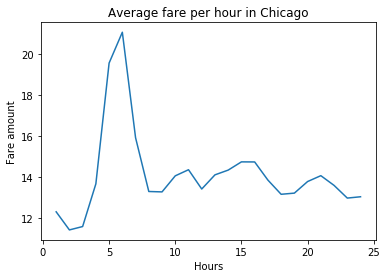

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
averagetaxitime = timehour()
x = [i[0] for i in averagetaxitime]
y = [float(i[1]) for i in averagetaxitime]
print (x)
print (y)
plt.plot(x,y)
plt.title('Average fare per hour in Chicago')
plt.xlabel('Hours')
plt.ylabel('Fare amount')
plt.show()